In [1]:
import numpy as np
import cv2
import imutils
import skimage

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [2]:
def show_img(image):
    plt.figure(figsize=(16,16))
    plt.imshow(image)

In [3]:
path = r'overhead-science.png'
img = cv2.imread(path)

In [4]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# show_img(rgb)

In [5]:
def show_split(img, labels):
    r, g, b = cv2.split(img)
    fig = plt.figure(figsize=(16,16))
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel(labels[0])
    axis.set_ylabel(labels[1])
    axis.set_zlabel(labels[2])
    plt.show()

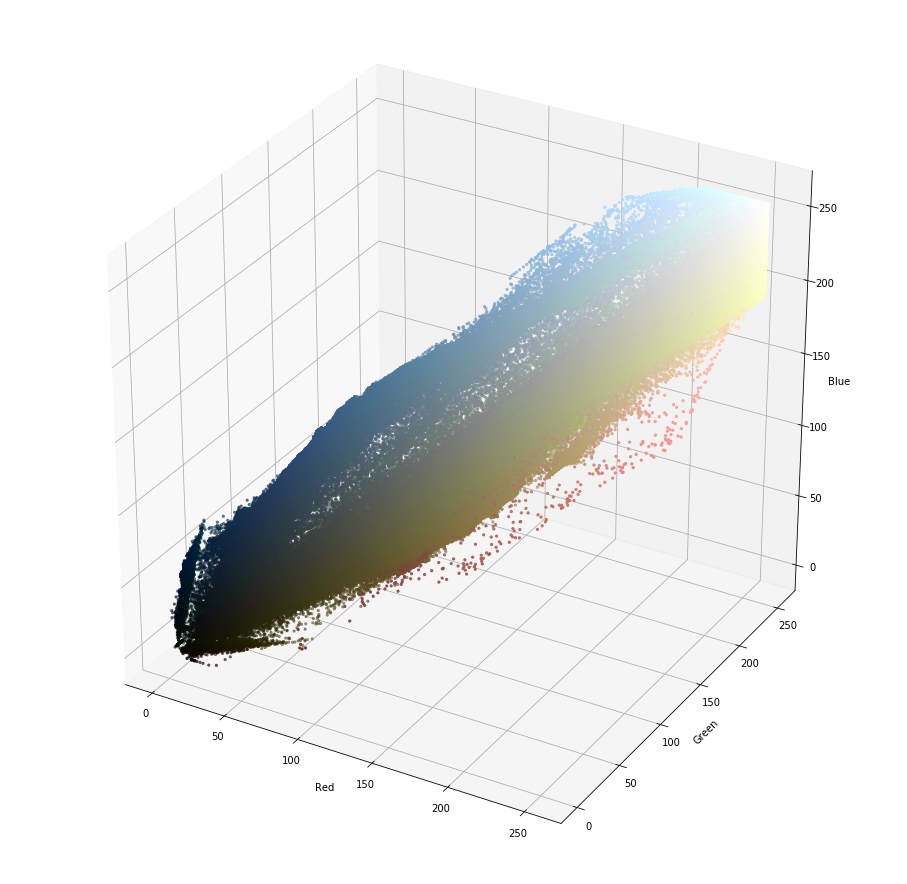

In [6]:
show_split(rgb, ('Red', 'Green', 'Blue'))

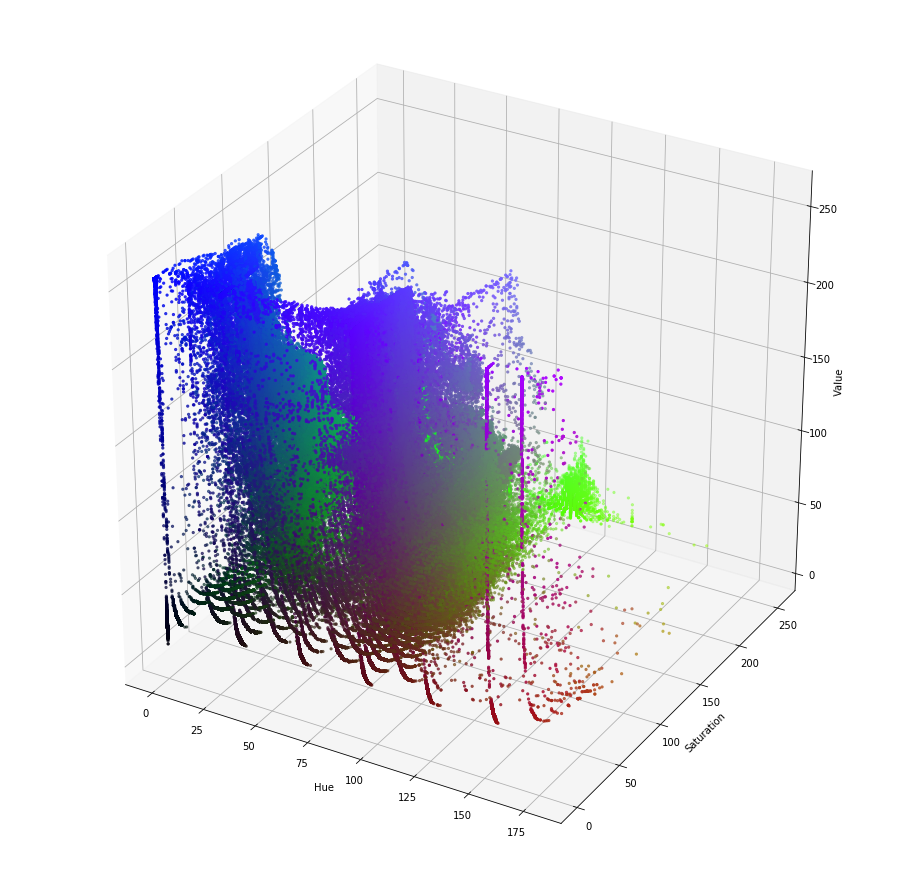

In [7]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
show_split(hsv, ('Hue', 'Saturation', 'Value'))

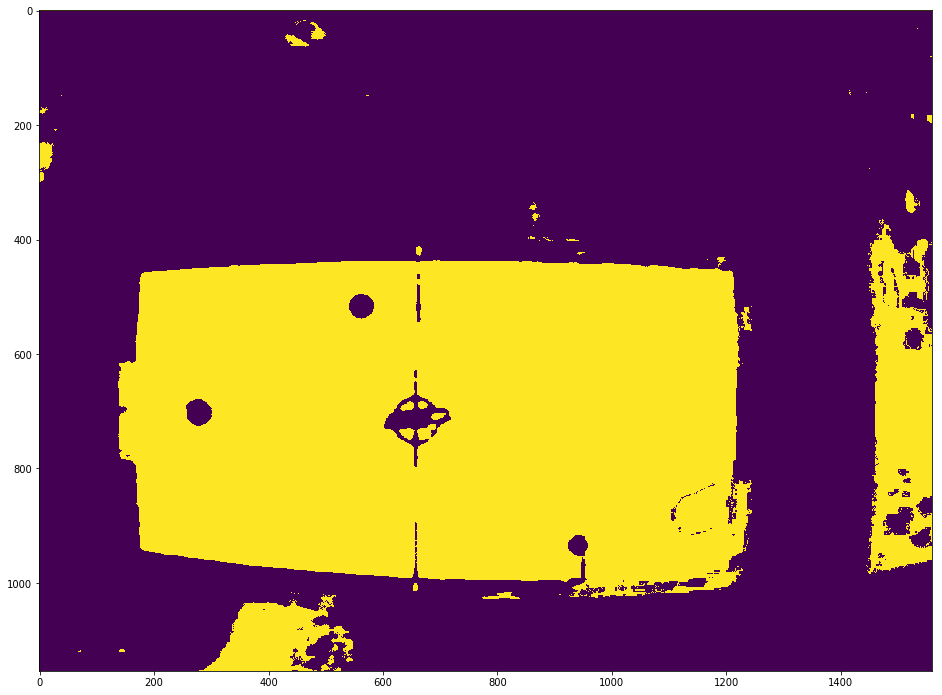

In [8]:
h = hsv
h[:,:,1:] = 0
t, h2 = cv2.threshold(h, 50, 255, cv2.THRESH_BINARY)
h2 = ~h2[:,:,0]
show_img(h2)

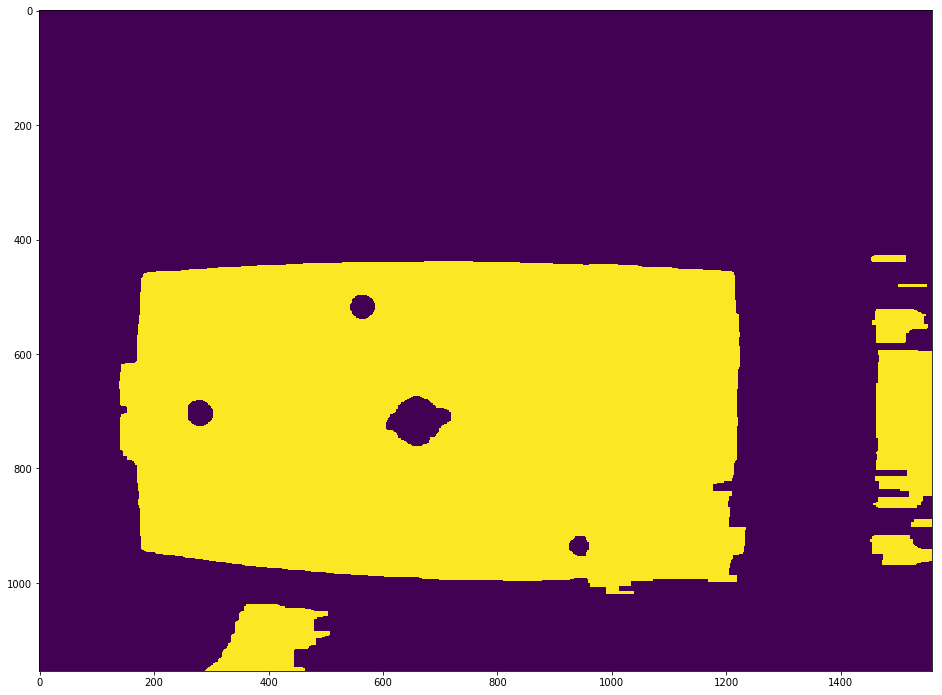

In [9]:
kernel = np.ones((5, 50))
opened =cv2.morphologyEx(h2,cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, np.ones((10,10)))
show_img(closed)

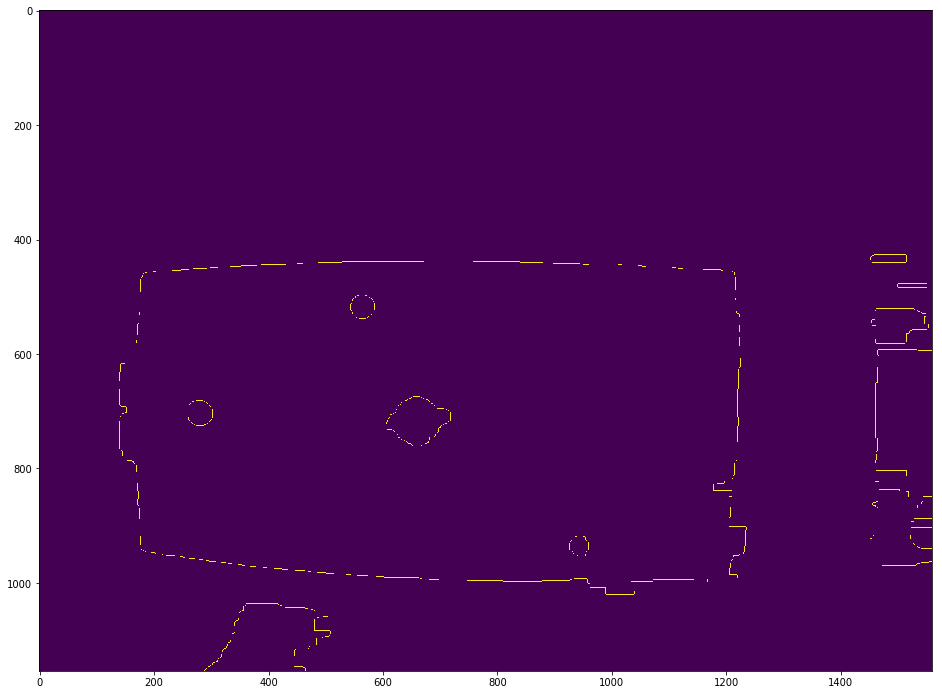

In [10]:
laplacian = cv2.Laplacian(closed,cv2.CV_8UC1)
show_img(laplacian)

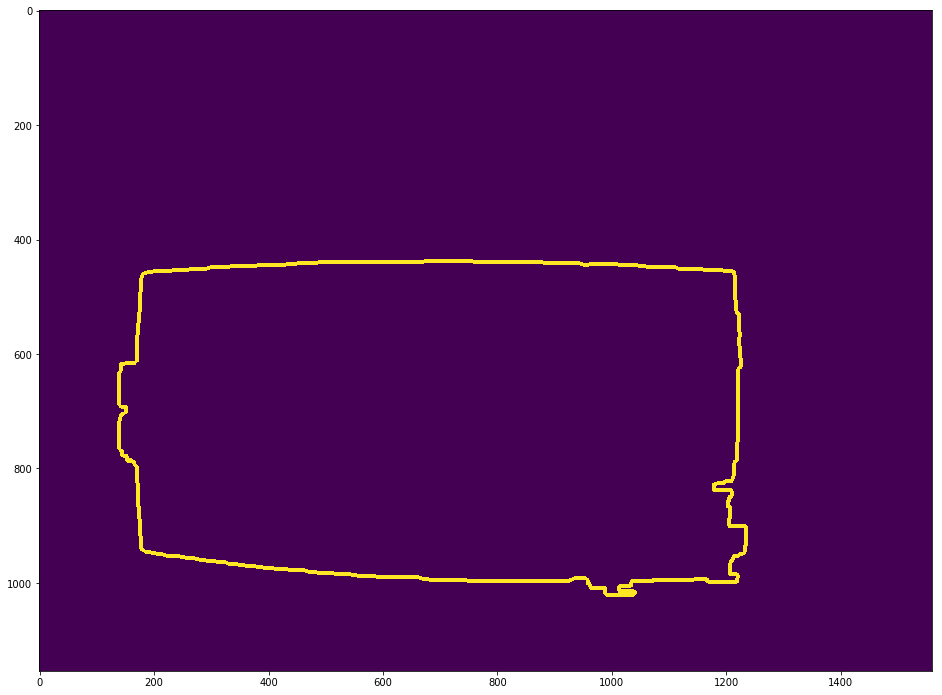

In [11]:
contours, hierarchy = cv2.findContours(laplacian, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

c = max(contours, key = cv2.contourArea)

test = cv2.drawContours(np.zeros_like(laplacian), [c], -1, (255,255,255), 5)

show_img(test)

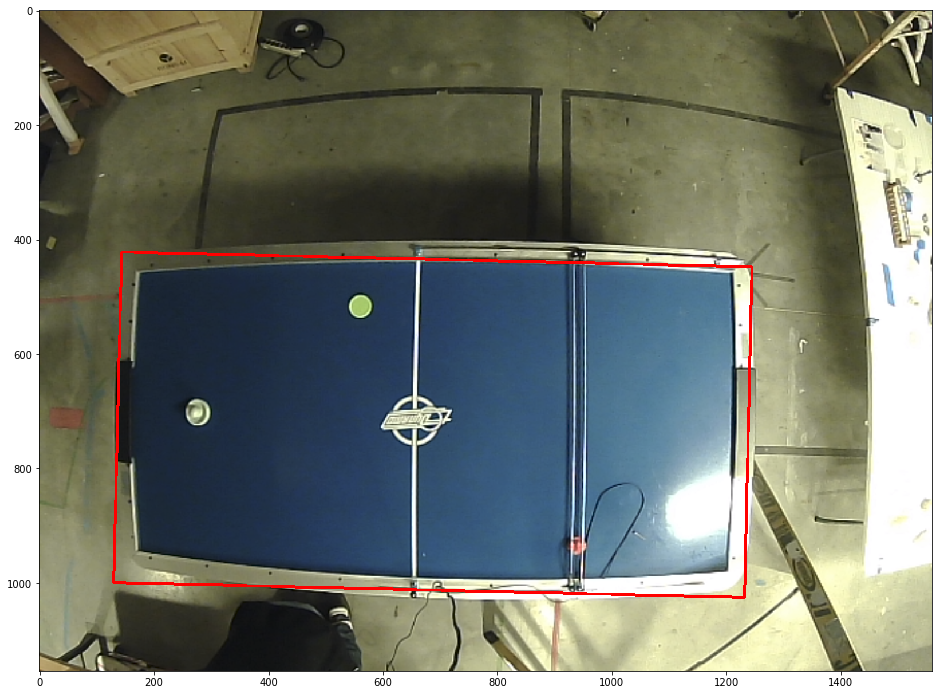

In [12]:
rect = cv2.minAreaRect(c)
box = cv2.boxPoints(rect)
box = np.int0(box)
disp = rgb.copy()
cv2.drawContours(disp,[box],0,(255,0,0),3)
show_img(disp)

In [13]:
def find_table(img):
    # isolate & enhance the HUE channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv[:,:,1:] = 0
    t, hue = cv2.threshold(hsv, 50, 255, cv2.THRESH_BINARY)
    hue = ~hue[:,:,0]
    
    # denoise
    kernel = np.ones((5, 50))
    opened = cv2.morphologyEx(hue,cv2.MORPH_OPEN, kernel)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, np.ones((10,10)))

    # get the largest contiguous blob
    laplacian = cv2.Laplacian(closed,cv2.CV_8UC1)
    contours, hierarchy = cv2.findContours(laplacian, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    c = max(contours, key = cv2.contourArea)
    test = cv2.drawContours(np.zeros_like(laplacian), [c], -1, (255,255,255), 5)

    # square it off
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    return box

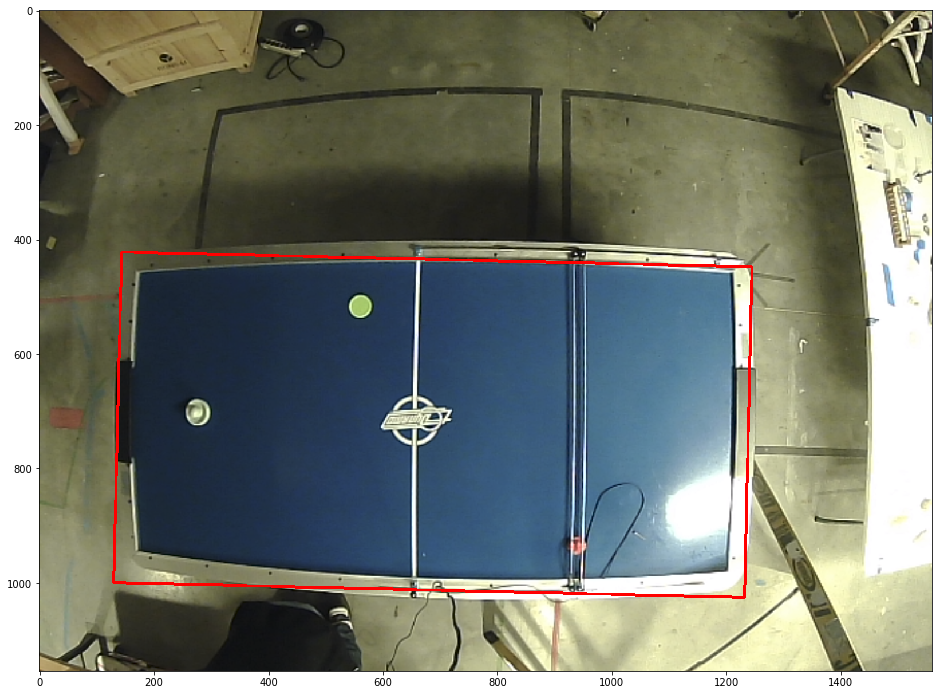

In [14]:
table = find_table(img)
disp = rgb.copy()
cv2.drawContours(disp, [table], 0, (255,0,0),3)
show_img(disp)